In [1]:
# 5 frame sequence 640x480 png grayscale

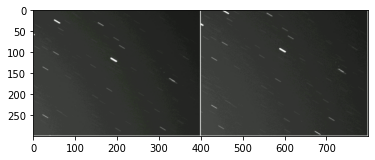

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

I1 = imread('../images/1a.png')
I2 = imread('../images/2a.png')

plt.imshow(np.hstack([I1, I2]))
plt.show()

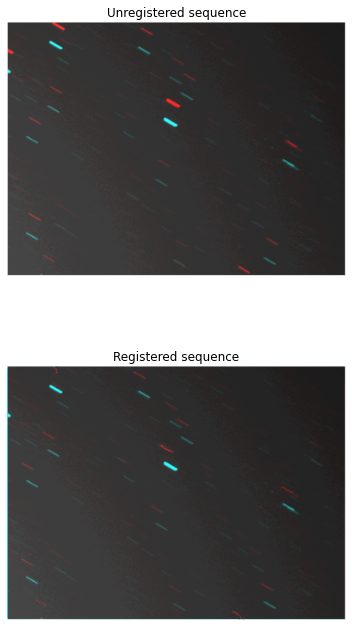

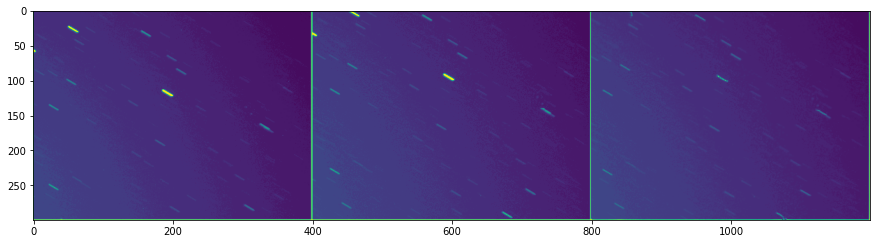

In [3]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1

# --- Load the sequence
image0, image1 = I1.copy(), I2.copy()

# --- Convert the images to gray level: color is not supported.
image0 = rgb2gray(image0)
image1 = rgb2gray(image1)

# --- Compute the optical flow
v, u = optical_flow_tvl1(image0, image1)

# --- Use the estimated optical flow for registration

nr, nc = image0.shape

row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc),
                                     indexing='ij')

image1_warp = warp(image1, np.array([row_coords + v, col_coords + u]),
                   mode='nearest')

# build an RGB image with the unregistered sequence
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = image1
seq_im[..., 1] = image0
seq_im[..., 2] = image0

# build an RGB image with the registered sequence
reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = image1_warp
reg_im[..., 1] = image0
reg_im[..., 2] = image0

# --- Show the result

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(5, 10))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im)
ax1.set_title("Registered sequence")
ax1.set_axis_off()

fig.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.imshow(np.hstack([image0, image1, image1_warp]))
plt.show()

Number of matches: 50
Number of inliers: 29


<Figure size 432x288 with 0 Axes>

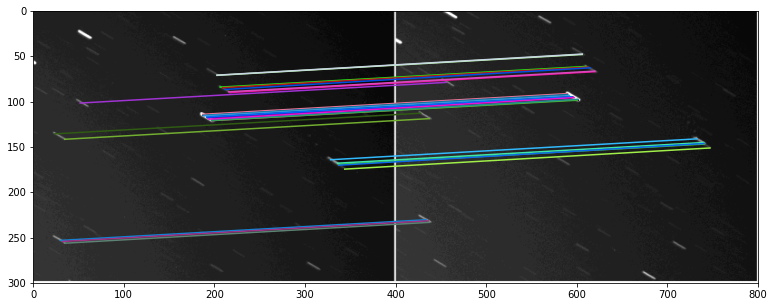

In [4]:
-

In [5]:
print(model)

<SimilarityTransform(matrix=
    [[ 1.00054487e+00,  1.04024484e-03,  3.04734294e+00],
     [-1.04024484e-03,  1.00054487e+00, -2.28179340e+01],
     [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])>


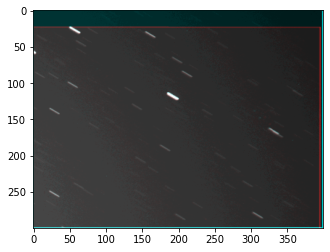

In [6]:
from skimage import transform

image1_tr = transform.warp(image1, model)

Iout = np.zeros((300, 400, 3))

Iout[:,:,0] = image1_tr
Iout[:,:,1] = image0
Iout[:,:,2] = image0

plt.imshow(Iout)
plt.show()

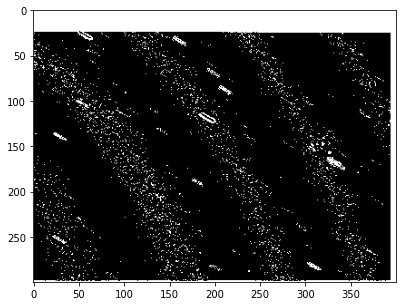

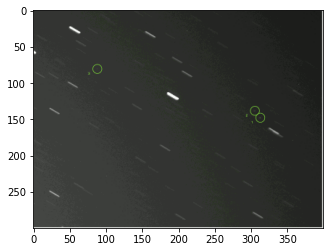

In [7]:
diff = np.absolute(image1_tr - image0)

Iground = imread("../images/1.png")

plt.figure(figsize=(15,5))
plt.imshow(diff > 0.025)
plt.show()

plt.imshow(Iground)
plt.show()

In [8]:
def process(Ifix, Imove):
    np.random.seed(0)
    
    img_left, img_right = Ifix.copy(), Imove.copy()
    img_left, img_right = map(rgb2gray, (img_left, img_right))

    # Find sparse feature correspondences between left and right image.
    descriptor_extractor = ORB()

    descriptor_extractor.detect_and_extract(img_left)
    keypoints_left = descriptor_extractor.keypoints
    descriptors_left = descriptor_extractor.descriptors

    descriptor_extractor.detect_and_extract(img_right)
    keypoints_right = descriptor_extractor.keypoints
    descriptors_right = descriptor_extractor.descriptors

    matches = match_descriptors(descriptors_left, descriptors_right, cross_check=True)
    
    x = np.flip(keypoints_left[matches[:, 0]], axis=1)
    y = np.flip(keypoints_right[matches[:, 1]], axis=1)

    model, inliers = ransac((x, y),
                            SimilarityTransform, min_samples=8,
                            residual_threshold=1, max_trials=5000)
    
    return model

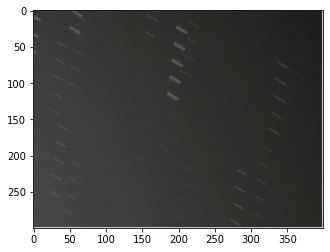

In [9]:
from skimage import color

frames = color.rgba2rgb([imread(f"../images/{i}a.png") for i in range(1, 6)])

Q = np.zeros((300, 400, 3))

for I in frames:
    Q += 0.2*I
    
plt.imshow(Q)
plt.show()


<IPython.core.display.Javascript object>


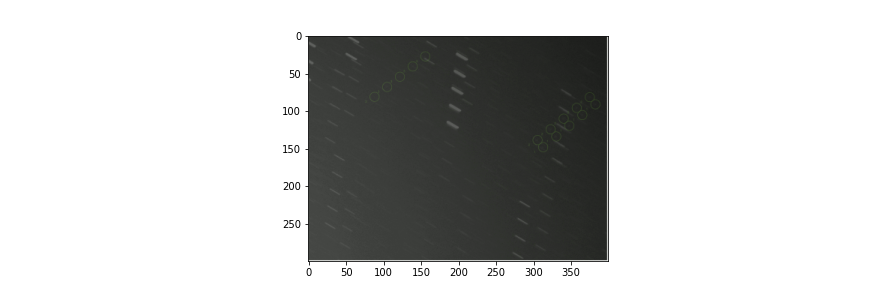

In [4]:
%matplotlib notebook

from skimage import color

frames = color.rgba2rgb([imread(f"../images/{i}.png") for i in range(1, 6)])

Q = np.zeros((300, 400, 3))

for I in frames:
    Q += 0.2*I
    
plt.imshow(Q)
plt.show()

In [10]:
frames = color.rgba2rgb([imread(f"../images/{i}a.png") for i in range(1, 6)])

T1 = process(frames[0], frames[1])
T2 = process(frames[1], frames[2])
T3 = process(frames[2], frames[3])
T4 = process(frames[3], frames[4])

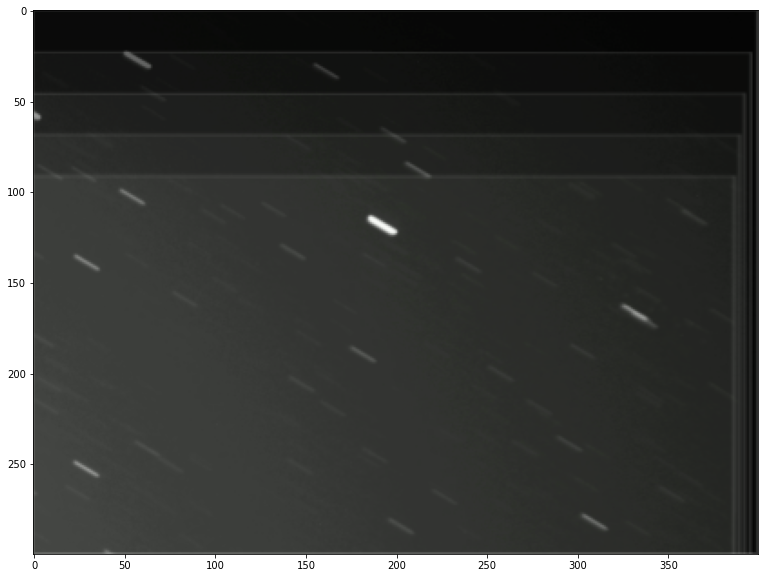

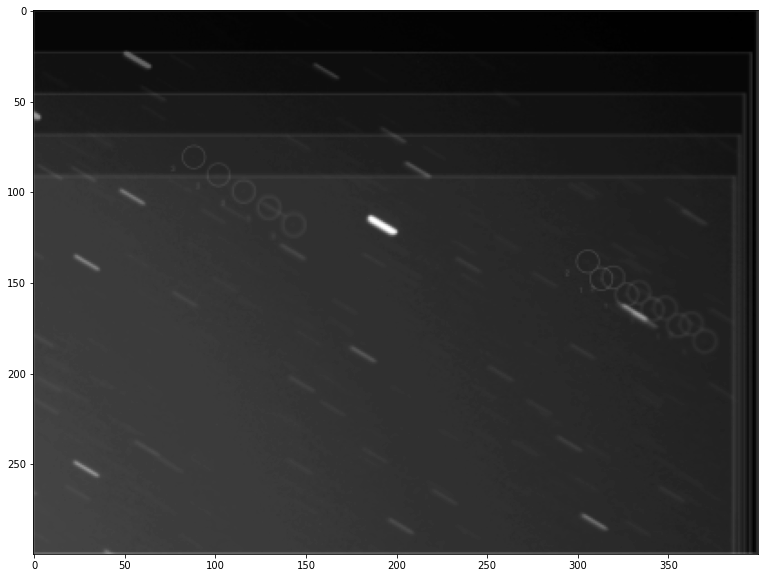

In [11]:
% matplotlib inline

I4 = transform.warp(transform.warp(transform.warp(transform.warp(frames[4], T4), T3), T2), T1)
I3 = transform.warp(transform.warp(transform.warp(frames[3], T3), T2), T1)
I2 = transform.warp(transform.warp(frames[2], T2), T1)
I1 = transform.warp(frames[1], T1)
I0 = frames[0]

sequence = [I0, I1, I2, I3, I4]

plt.figure(figsize=(25, 10))
plt.imshow(0.2*I0 + 0.2*I4 + 0.2*I3 + 0.2*I2+0.2*I1)
plt.show()

ground = color.rgba2rgb([imread(f"../images/{i}.png") for i in range(1, 6)])

I4 = transform.warp(transform.warp(transform.warp(transform.warp(ground[4], T4), T3), T2), T1)
I3 = transform.warp(transform.warp(transform.warp(ground[3], T3), T2), T1)
I2 = transform.warp(transform.warp(ground[2], T2), T1)
I1 = transform.warp(ground[1], T1)

Iground = rgb2gray(0.2*ground[0] + 0.2*I4 + 0.2*I3 + 0.2*I2+0.2*I1)

plt.figure(figsize=(25, 10))
plt.imshow(Iground)
plt.show()

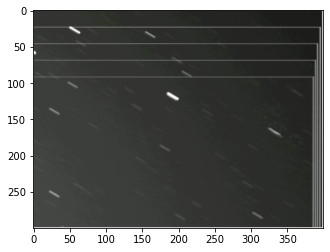

In [12]:
Imax = np.max(sequence, axis=0)

plt.imshow(Imax)
plt.show()

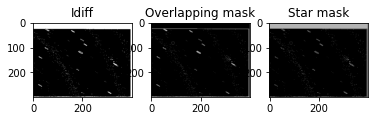

In [15]:
%matplotlib inline


# How do we find the targets?

star_mask = (rgb2gray(sequence[0]) > 0.4) + (rgb2gray(sequence[1]) > 0.4)

# Pairwise image difference where they overlap

mask = rgb2gray(sequence[1]) > 0

Idiff = np.linalg.norm(sequence[1] - sequence[0], axis=-1)

fig, axs = plt.subplots(1, 3)

axs[0].imshow(Idiff > 0.05)
axs[0].set_title('Idiff')

axs[1].imshow( (Idiff > 0.05)*mask )
axs[1].set_title('Overlapping mask')
axs[1].imshow(ground[0,:,:,1] > 0.5, alpha=0.4)

axs[2].imshow( (Idiff > 0.05)*~star_mask )
axs[2].set_title('Star mask')
axs[2].imshow(ground[0,:,:,1] > 0.5, alpha=0.3)

plt.show()

(5, 300, 400) float64
(5, 300) float64


<IPython.core.display.Javascript object>


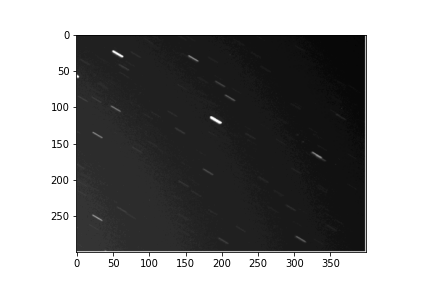

In [65]:
%matplotlib notebook

from skimage import morphology

seq = np.array(sequence)
seq = rgb2gray(seq)

print(seq.shape, seq.dtype)

Idiff = ((seq[1] - seq[0])**2)*(seq[1] > 0) + \
        ((seq[2] - seq[1])**2)*(seq[2] > 0) + \
        ((seq[3] - seq[2])**2)*(seq[3] > 0) + \
        ((seq[4] - seq[3])**2)*(seq[4] > 0)

Idiff = np.clip(Idiff, 0, 1)

print(frames.shape, frames.dtype)

# plt.imshow(Idiff[70:100,80:100])
# plt.imshow(Iground[70:100,80:100] > 0.2, alpha=0.5)
Iout = morphology.local_maxima(Idiff[130:200,300:380]) * Idiff[130:200,300:380]> 0.01

plt.imshow(Iout)
plt.imshow(Iground[130:200,300:380], alpha=0.5)
plt.show()



<SimilarityTransform(matrix=
    [[ 1.00054487e+00,  1.04024484e-03,  3.04734294e+00],
     [-1.04024484e-03,  1.00054487e+00, -2.28179340e+01],
     [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])>
[153  77]


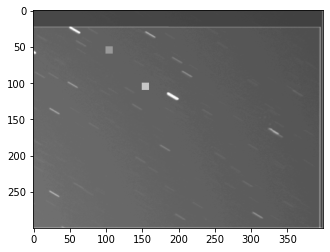

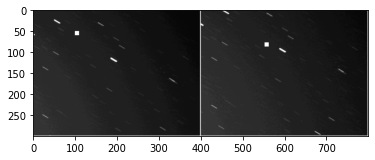

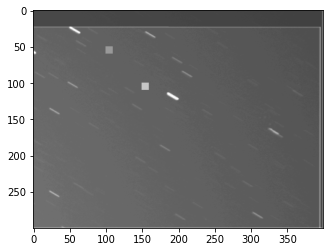

In [143]:
%matplotlib inline

frames = [imread(f"../images/{i}a.png", as_gray=True) for i in range(1, 6)]

obj = np.int32([100, 50])

Iin = frames[0].copy()
Iin[obj[1]:obj[1]+10, obj[0]:obj[0]+10] = 1

# Transform frame1 in coord as frame0
print(T1)

Iin1 = frames[1].copy()
Iin1_0 = transform.warp(Iin1, T1)

obj = obj + np.int32([50, 50]) # move object
Iin1_0[obj[1]:obj[1]+10, obj[0]:obj[0]+10] = 1

# Now transform back to original frame coord
z = transform.matrix_transform(obj, T1.params) # transform.matrix_transform(obj, T1.matrix)
z = np.int32(np.round(z))[0]

print(z)

Iout1 = Iin1.copy()
Iout1[z[1]:z[1]+10, z[0]:z[0]+10] = 1

# Now cross-check, revert back to 0-frame
Iout_0 = transform.warp(Iout1, T1)

plt.imshow(Iin, alpha=0.5)
plt.imshow(Iin1_0, alpha=0.5)
plt.show()

plt.imshow(np.hstack([Iin, Iout1]))
plt.show()

plt.imshow(Iin, alpha=0.5)
plt.imshow(Iout_0, alpha=0.5)
plt.show()